In [4]:
import numpy as np
import sklearn
import pandas as pd
import scipy
import matplotlib.pyplot as plt

plt.style.use('classic')

In [2]:
state = pd.read_csv("state.csv")
state

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE
8,Florida,18801310,5.8,FL
9,Georgia,9687653,5.7,GA


In [18]:
# 인구의 평균
population_mean = state['Population'].mean()

# 인구의 절사평균 - 최대값, 최소값에 10%를 제거하고 평균을 구함
population_trim_mean = scipy.stats.trim_mean(state['Population'], 0.1)

# 인구의 중위값
population_median = state['Population'].median()

print(f"Population : \nmean : {population_mean}\ntrim_mean(10%) : {population_trim_mean}\nmedian : {population_median}")

Population : 
mean : 6162876.3
trim_mean(10%) : 4783697.125
median : 4436369.5


median 보다 mean 이 큰 것으로 보아 큰 outlier이 존재함을 알 수 있다.   
또한 trim_mean(10%) 과 median이 비슷한 것으로 보아 이 outlier은 상위 10% 에 밀집해 있다는 것도 알 수 있다.

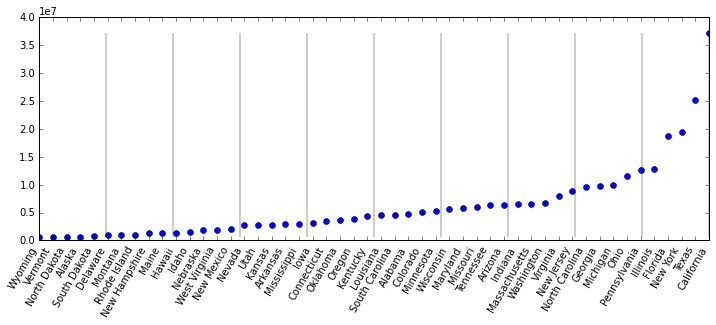

In [55]:
# 데이터를 정렬하여 10% 구간별로 나누어 살펴봄

state_sorted = state.iloc[:,:2].sort_values('Population')
plt.figure(figsize = (12,4))
plt.plot(state_sorted.State, state_sorted.Population, 'o')
plt.xticks(rotation = 60, ha = 'right')
x = plt.gca()
bounds = x.get_xbound()
plt.vlines(np.linspace(*bounds,11), min(state_sorted.Population), 
           max(state_sorted.Population),linewidth = 2, alpha = 0.2, colors = 'black')